In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torch import nn
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더
import torch.nn.functional as F

import copy
from tqdm import tqdm
import math
from stack_CNN import FCN_ref
from CNN import FCN_ref, FCN_binary

### Model and Data

In [3]:
path = './Dataset/param/'
device = torch.device('cuda')
model = FCN_ref()
# model = BLNet()
model.load_state_dict(torch.load(path+ "baseline(CNN, no weight sharing, ssa,ppg new minmax , pivotal).pt"))
model.to(device)
model.eval()

FCN_ref(
  (ssa_fcn_ir): FCN(
    (fcn_block): BlockFCN(
      (conv1): BlockFCNConv(
        (conv): Conv1d(1, 128, kernel_size=(64,), stride=(1,))
        (batch_norm): BatchNorm1d(128, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
        (relu): ELU(alpha=1.0)
      )
      (conv2): BlockFCNConv(
        (conv): Conv1d(128, 256, kernel_size=(32,), stride=(1,))
        (batch_norm): BatchNorm1d(256, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
        (relu): ELU(alpha=1.0)
      )
      (conv3): BlockFCNConv(
        (conv): Conv1d(256, 128, kernel_size=(24,), stride=(1,))
        (batch_norm): BatchNorm1d(128, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
        (relu): ELU(alpha=1.0)
      )
      (conv4): BlockFCNConv(
        (conv): Conv1d(128, 64, kernel_size=(32,), stride=(1,))
        (batch_norm): BatchNorm1d(64, eps=0.001, momentum=0.99, affine=True, track_running_stats=True)
        (relu): ELU(alpha=1.0)
      )

In [10]:
path = 'H:/내 드라이브/spo2/Data/Dataset/'

# ppg
test_data_ppg_ir = pd.read_csv(path + 'testset/ppg_ir_pivotal_new_minmax.csv')
test_data_ppg_red = pd.read_csv(path + 'testset/ppg_red_pivotal_new_minmax.csv')


# ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,751)]
# ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,751)]

ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

ppg_ir = copy.deepcopy(test_data_ppg_ir[ppg_ir_index].values)
ppg_red = copy.deepcopy(test_data_ppg_red[ppg_red_index].values)

# test_data = np.concatenate([ppg_ir, ppg_red], 1)

# ssa
test_data_ssa_ir = pd.read_csv(path + 'testset/ssa_ir_pivotal_new_minmax.csv')
test_data_ssa_red = pd.read_csv(path + 'testset/ssa_red_pivotal_new_minmax.csv')

ssa_ir_index = ["ssa_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
ssa_red_index = ["ssa_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

ssa_ir = copy.deepcopy(test_data_ssa_ir[ssa_ir_index].values)
ssa_red = copy.deepcopy(test_data_ssa_red[ssa_red_index].values)

test_data = np.concatenate([ssa_ir, ssa_red], 1)

# ssa & ppg
# test_data = np.concatenate([ssa_ir, ssa_red, ppg_ir, ppg_red], 1)

# spo2
test_data_spo2 = pd.read_csv(path + 'testset/spo2_pivotal.csv')
test_spo2 = copy.deepcopy(test_data_spo2[["spo2_ref"]].values)


# test_data = torch.FloatTensor(test_data)
# test = torch.FloatTensor(test_spo2)   

# test_data = test_data.to(device)

In [11]:
ex_result = pd.DataFrame({'ambulatory':[],'ambul_self':[],'pivotal':[],'chamber':[]})

#### 그림공부

[86.8]


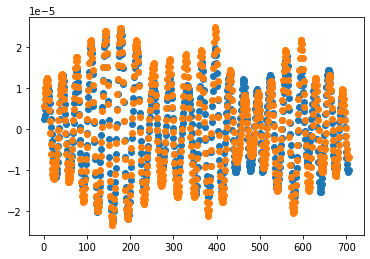

In [26]:
i = 34308
plt.scatter([i for i in range(1,706)],test_data_ssa_ir.iloc[i,3:])
plt.scatter([i for i in range(1,706)],test_data_ssa_red.iloc[i,3:])
print(test_spo2[i])

In [71]:
len(low_index)

2417

In [66]:
high_index = test_data_spo2[test_data_spo2.spo2_ref >= 95].index
low_index = test_data_spo2[test_data_spo2.spo2_ref < 90].index

In [41]:
test_data_ssa_ir['max_value'] = pd.DataFrame.max(test_data_ssa_ir.iloc[:,3:],axis=1)
test_data_ssa_red['max_value'] = pd.DataFrame.max(test_data_ssa_red.iloc[:,3:],axis=1)

(array([ 32.,   1.,  28.,  57.,  94., 115., 136., 155., 189., 194.]),
 array([0.0e+00, 3.0e-06, 6.0e-06, 9.0e-06, 1.2e-05, 1.5e-05, 1.8e-05,
        2.1e-05, 2.4e-05, 2.7e-05, 3.0e-05]),
 <BarContainer object of 10 artists>)

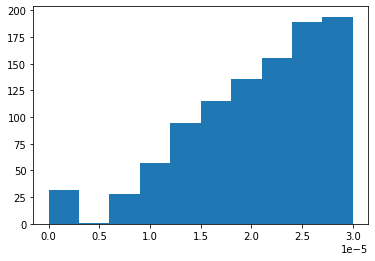

In [65]:
plt.hist(test_data_ssa_ir.iloc[high_index,-1], range=[0,0.00003])

(array([ 0.,  1., 15., 22., 27., 38., 36., 32., 22., 23.]),
 array([0.0e+00, 3.0e-06, 6.0e-06, 9.0e-06, 1.2e-05, 1.5e-05, 1.8e-05,
        2.1e-05, 2.4e-05, 2.7e-05, 3.0e-05]),
 <BarContainer object of 10 artists>)

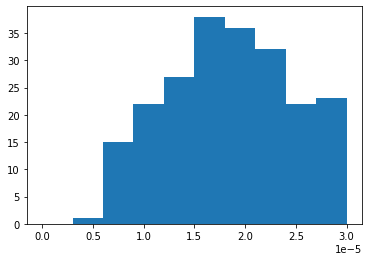

In [72]:
plt.hist(test_data_ssa_ir.iloc[low_index,-1], range=[0,0.00003])

In [21]:
np.where(test_spo2 < 90)

(array([25647, 25648, 25649, ..., 34299, 34303, 34308], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [44]:
data_len = 2260
batch = 512
n = data_len//batch
m = batch*n
pred = []

with torch.no_grad():
    for i in range(n):
        prediction = model(test_data[i*batch:(i+1)*batch])
        pred.append(prediction)
    prediction = model(test_data[m:])
    pred.append(prediction)

v = 0
for i in range(n):
    cost =  F.mse_loss(pred[i], test[i*batch:(i+1)*batch].to(device), reduction='sum')
    v += cost.item()
cost =  F.mse_loss(pred[-1], test[m:].to(device), reduction='sum')
v += cost.item()
print(math.sqrt(v/data_len))


4.702399463154505


In [80]:
ex_result = pd.DataFrame({'ambulatory':[],'ambul_self':[],'pivotal':[],'chamber':[]})

### Ambulatory

#### ambulatory

In [79]:
# ppg
# ambulatory_index = test_data_ppg_ir[test_data_ppg_ir.dataset  == 'ambulatory'].index

# ambulatory_ppg_ir = test_data_ppg_ir.iloc[ambulatory_index,:]
# ambulatory_ppg_red = test_data_ppg_red.iloc[ambulatory_index,:]

# ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,751)]
# ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,751)]

# ambulatory_ppg_ir = copy.deepcopy(ambulatory_ppg_ir[ppg_ir_index].values)
# ambulatory_ppg_red = copy.deepcopy(ambulatory_ppg_red[ppg_red_index].values)

# ambulatory = np.concatenate([ambulatory_ppg_ir, ambulatory_ppg_red], 1)

# ssa
ambulatory_index = test_data_ssa_ir[test_data_ssa_ir.dataset  == 'ambulatory'].index
ambulatory_ssa_ir = test_data_ssa_ir.iloc[ambulatory_index,:]
ambulatory_ssa_red = test_data_ssa_red.iloc[ambulatory_index,:]

ssa_ir_index = ["ssa_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
ssa_red_index = ["ssa_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

ambulatory_ssa_ir = copy.deepcopy(ambulatory_ssa_ir[ssa_ir_index].values)
ambulatory_ssa_red = copy.deepcopy(ambulatory_ssa_red[ssa_red_index].values)

ambulatory = np.concatenate([ambulatory_ssa_ir, ambulatory_ssa_red], 1)

# ambulatory = np.concatenate([ambulatory_ssa_ir, ambulatory_ssa_red,ambulatory_ppg_ir,ambulatory_ppg_red], 1)

#spo2
ambulatory_spo2 = test_data_spo2.iloc[ambulatory_index,:]
ambulatory_test_spo2 = copy.deepcopy(ambulatory_spo2[["spo2_ref"]].values)

ambulatory = torch.FloatTensor(ambulatory)
ambulatory_test = torch.FloatTensor(ambulatory_test_spo2)   
ambulatory = ambulatory.to(device)

# ambulatory

data_len = 25468
batch = 512
n = data_len//batch
m = batch*n

big = 0
small = 0

pred = []

for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(ambulatory[i*batch:(i+1)*batch])
        pred += list(prediction.cpu())
        a = list(prediction >= 95).count(True)
        b = list(prediction < 90).count(True)
        big += a
        small += b

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(ambulatory[m:])
    pred += list(prediction.cpu())
    a = list(prediction >= 95).count(True)
    b = list(prediction < 90).count(True)
    big += a
    small += b


print('95이상        :', big,'   ', big/data_len,'%')
print('95미만 90이상 :', data_len-small-big,'   ', (data_len-small-big)/data_len,'%')
print('90미만        :', small,'   ',small/data_len,'%')

ex_result['ambulatory'] = np.array([round(big/data_len,4),round((data_len-small-big)/data_len,4),round(small/data_len,4)])


95이상        : 13087     0.5138605308622585 %
95미만 90이상 : 6622     0.26001256478718393 %
90미만        : 5759     0.22612690435055757 %


NameError: name 'ex_result' is not defined

In [81]:
df = pd.DataFrame(index = list(ambulatory_test), data = pred, columns=['pred'])
df['color'] = np.NaN

for i in range(len(df)):
    if df.iloc[i,0] >= 95:
        col ='blue'
    elif df.iloc[i,0] < 95 and df.iloc[i,0] >= 90:
        col ='green'
    else:
        col ='red'
    df.iloc[i,1] = col

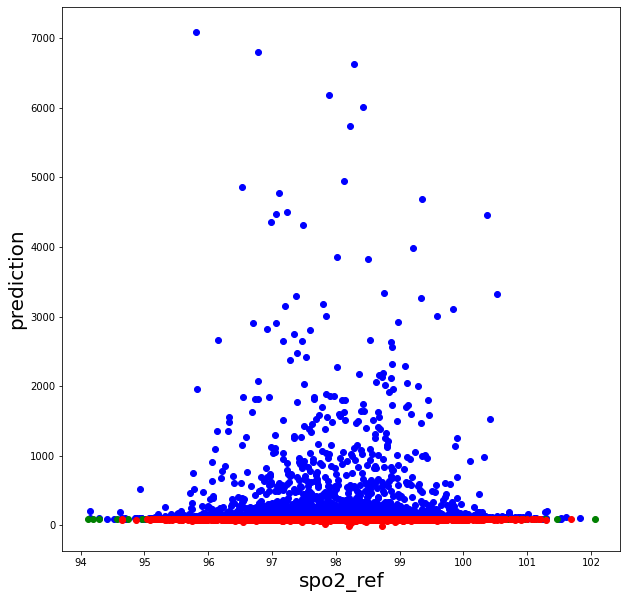

In [86]:
plt.figure(figsize=(10,10))
plt.xlabel('spo2_ref',fontsize='20')
plt.ylabel('prediction',fontsize='20')
# plt.ylim(70,110)
# plt.xlim(70,110)
for i in ['blue', 'green', 'red']:
    plt.scatter(df[df.color == i].index,df[df.color == i].pred,c=i)


#### ambul_self

In [17]:
ambul_self_index = test_data_ppg_ir[test_data_ppg_ir.dataset  == 'ambul_self'].index

# ppg
ambul_self_ppg_ir = test_data_ppg_ir.iloc[ambul_self_index,:]
ambul_self_ppg_red = test_data_ppg_red.iloc[ambul_self_index,:]

ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,751)]
ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,751)]

ambul_self_ppg_ir = copy.deepcopy(ambul_self_ppg_ir[ppg_ir_index].values)
ambul_self_ppg_red = copy.deepcopy(ambul_self_ppg_red[ppg_red_index].values)

ambul_self = np.concatenate([ambul_self_ppg_ir, ambul_self_ppg_red], 1)

# ssa
# ambul_self_ssa_ir = test_data_ssa_ir.iloc[ambul_self_index,:]
# ambul_self_ssa_red = test_data_ssa_red.iloc[ambul_self_index,:]

# ssa_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
# ssa_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

# ambul_self_ssa_ir = copy.deepcopy(ambul_self_ssa_ir[ssa_ir_index].values)
# ambul_self_ssa_red = copy.deepcopy(ambul_self_ssa_red[ssa_red_index].values)

# ambul_self = np.concatenate([ambul_self_ssa_ir, ambul_self_ssa_red], 1)

# ambul_self = np.concatenate([ambul_self_ssa_ir, ambul_self_ssa_red,ambul_self_ppg_ir,ambul_self_ppg_red], 1)

#spo2
ambul_self_spo2 = test_data_spo2.iloc[ambul_self_index,:]
ambul_self_test_spo2 = copy.deepcopy(ambul_self_spo2[["spo2_ref"]].values)

ambul_self = torch.FloatTensor(ambul_self)
ambul_self_test = torch.FloatTensor(ambul_self_test_spo2)   
ambul_self = ambul_self.to(device)

# ambul_self

data_len = 2724
batch = 10
n = data_len//batch
m = batch*n

big = 0
small = 0

pred = []

for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(ambulatory[i*batch:(i+1)*batch])
        pred += list(prediction.cpu())
        a = list(prediction >= 95).count(True)
        b = list(prediction < 90).count(True)
        big += a
        small += b

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(ambulatory[m:])
    pred += list(prediction.cpu())
    a = list(prediction >= 95).count(True)
    b = list(prediction < 90).count(True)
    big += a
    small += b


print('95이상        :', big,'   ', big/data_len,'%')
print('95미만 90이상 :', data_len-small-big,'   ', (data_len-small-big)/data_len,'%')
print('90미만        :', small,'   ',small/data_len,'%')

ex_result['ambul_self'] = np.array([round(big/data_len,4),round((data_len-small-big)/data_len,4),round(small/data_len,4)])

RuntimeError: CUDA out of memory. Tried to allocate 7.45 GiB (GPU 0; 10.00 GiB total capacity; 440.94 MiB already allocated; 7.24 GiB free; 460.00 MiB reserved in total by PyTorch)

In [ ]:
df = pd.DataFrame(index = list(ambulatory_test), data = pred, columns=['pred'])
df['color'] = np.NaN

for i in range(len(df)):
    if df.iloc[i,0] >= 95:
        col ='blue'
    elif df.iloc[i,0] < 95 and df.iloc[i,0] >= 90:
        col ='green'
    else:
        col ='red'
    df.iloc[i,1] = col

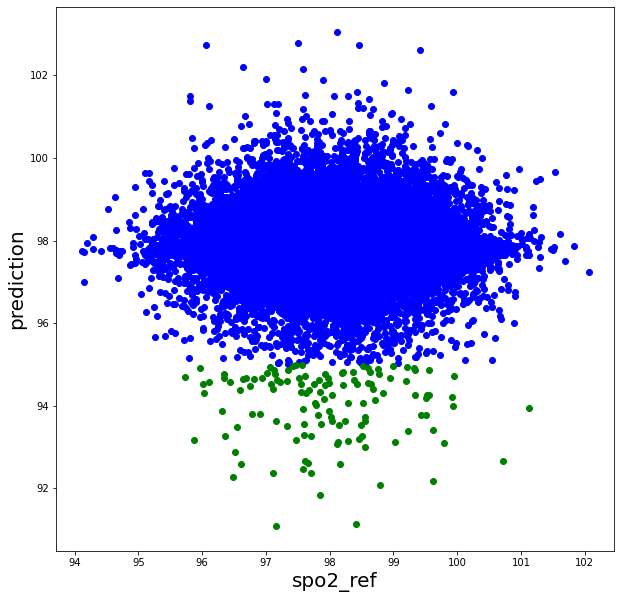

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('spo2_ref',fontsize='20')
plt.ylabel('prediction',fontsize='20')

for i in ['blue', 'green', 'red']:
    plt.scatter(df[df.color == i].index,df[df.color == i].pred,c=i)


### Chmaber.Pivotal

#### pivotal (움직임 없음 ,2260)

In [12]:
# ppg
pivotal_index = test_data_ppg_ir[test_data_ppg_ir.dataset  == 'pivotal'].index

pivotal_ppg_ir = test_data_ppg_ir.iloc[pivotal_index,:]
pivotal_ppg_red = test_data_ppg_red.iloc[pivotal_index,:]

# ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,751)]
# ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,751)]

ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

pivotal_ppg_ir = copy.deepcopy(pivotal_ppg_ir[ppg_ir_index].values)
pivotal_ppg_red = copy.deepcopy(pivotal_ppg_red[ppg_red_index].values)

# pivotal = np.concatenate([pivotal_ppg_ir, pivotal_ppg_red], 1)

# ssa
pivotal_index = test_data_ssa_ir[test_data_ssa_ir.dataset  == 'pivotal'].index
pivotal_ssa_ir = test_data_ssa_ir.iloc[pivotal_index,:]
pivotal_ssa_red = test_data_ssa_red.iloc[pivotal_index,:]

ssa_ir_index = ["ssa_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
ssa_red_index = ["ssa_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

pivotal_ssa_ir = copy.deepcopy(pivotal_ssa_ir[ssa_ir_index].values)
pivotal_ssa_red = copy.deepcopy(pivotal_ssa_red[ssa_red_index].values)

pivotal = np.concatenate([pivotal_ssa_ir, pivotal_ssa_red], 1)

# pivotal = np.concatenate([pivotal_ssa_ir, pivotal_ssa_red,pivotal_ppg_ir,pivotal_ppg_red], 1)

#spo2
pivotal_spo2 = test_data_spo2.iloc[pivotal_index,:]
pivotal_test_spo2 = copy.deepcopy(pivotal_spo2[["spo2_ref"]].values)

pivotal = torch.FloatTensor(pivotal)
pivotal_test = torch.FloatTensor(pivotal_test_spo2)   
pivotal = pivotal.to(device)

# pivotal

data_len = 2260
batch = 256
n = data_len//batch
m = batch*n

total = 0
pred = []
for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(pivotal[i*batch:(i+1)*batch])
        pred += list(prediction.cpu())
        total += sum((prediction-pivotal_test[i*batch:(i+1)*batch].to(device))**2)
        # total += sum(abs(prediction-pivotal_test[i*batch:(i+1)*batch].to(device)))

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(pivotal[m:])
    pred += list(prediction.cpu())
    total += sum((prediction-pivotal_test[m:].to(device))**2)
    # total += sum(abs(prediction-pivotal_test[m:].to(device)))

print(torch.sqrt(total/data_len))


tensor([6.7802], device='cuda:0')


In [13]:
df = pd.DataFrame(index = list(pivotal_test), data = pred, columns=['pred'])
df['difference'] = np.NaN

for i in range(len(df)):
    if abs(df.index[i] - df.iloc[i,0]) < 4:
        col ='blue'
    else:
        col ='red'
    df.iloc[i,1] = col

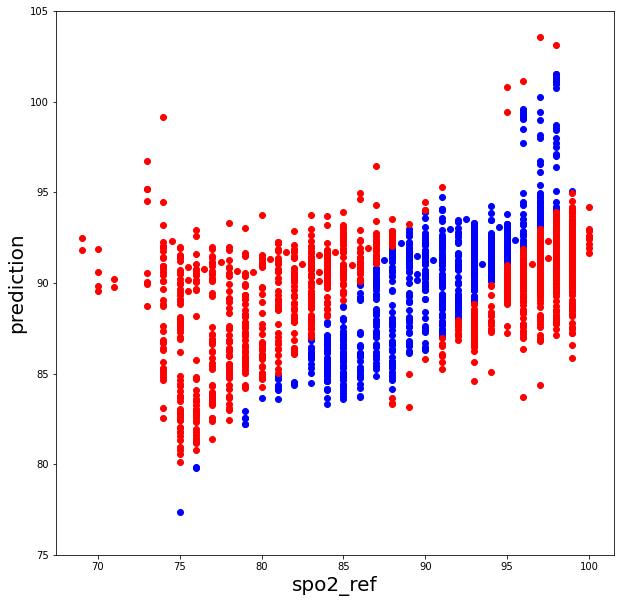

In [19]:
plt.figure(figsize=(10,10))
plt.xlabel('spo2_ref',fontsize='20')
plt.ylabel('prediction',fontsize='20')
# plt.xlim([65,105])
plt.ylim([75,105])

for i in ['blue', 'red']:
    plt.scatter(df[df.difference == i].index,df[df.difference == i].pred,c=i)


In [15]:
wrong = 0 

for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(pivotal[i*batch:(i+1)*batch])
        wrong += list(abs(prediction-pivotal_test[i*batch:(i+1)*batch].to(device)) > 4).count(True)

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(pivotal[m:])
    wrong += list(abs(prediction-pivotal_test[m:].to(device)) > 4).count(True)
    

print('수율: ', round(((data_len-wrong)/data_len)*100,2),'%')

loss = 0
for i in range(data_len):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(pivotal[i:i+1,:])
        diff = abs(prediction-pivotal_test[i].to(device))

        if diff > 4:
            pass
        else: 
            loss += diff**2

print('수율 내 rmse: ', torch.sqrt(loss/(data_len-wrong)))

수율:  37.48 %
수율 내 rmse:  tensor([[2.3955]], device='cuda:0')


In [16]:
if wrong != data_len:
    ex_result['pivotal'] = np.array([round(torch.sqrt(total/data_len).item(),4),round(((data_len-wrong)/data_len)*100,4),round(torch.sqrt(loss/(data_len-wrong)).item(),4)])
else:
    ex_result['pivotal'] = np.array([round(torch.sqrt(total/data_len).item(),4),0,0])

#### Chamber 움직임 있음 (3863)

In [15]:
chamber_index = test_data_ppg_ir[test_data_ppg_ir.dataset  == 'chamber'].index

# ppg
chamber_ppg_ir = test_data_ppg_ir.iloc[chamber_index,:]
chamber_ppg_red = test_data_ppg_red.iloc[chamber_index,:]

ppg_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,751)]
ppg_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,751)]

chamber_ppg_ir = copy.deepcopy(chamber_ppg_ir[ppg_ir_index].values)
chamber_ppg_red = copy.deepcopy(chamber_ppg_red[ppg_red_index].values)

chamber = np.concatenate([chamber_ppg_ir, chamber_ppg_red], 1)

# ssa
# chamber_ssa_ir = test_data_ssa_ir.iloc[chamber_index,:]
# chamber_ssa_red = test_data_ssa_red.iloc[chamber_index,:]

# ssa_ir_index = ["ppg_ir_{0:03d}".format(file_ind) for file_ind in range(1,706)]
# ssa_red_index = ["ppg_red_{0:03d}".format(file_ind) for file_ind in range(1,706)]

# chamber_ssa_ir = copy.deepcopy(chamber_ssa_ir[ssa_ir_index].values)
# chamber_ssa_red = copy.deepcopy(chamber_ssa_red[ssa_red_index].values)

# chamber = np.concatenate([chamber_ssa_ir, chamber_ssa_red], 1)

# chamber = np.concatenate([chamber_ssa_ir, chamber_ssa_red,chamber_ppg_ir,chamber_ppg_red], 1)

#spo2
chamber_spo2 = test_data_spo2.iloc[chamber_index,:]
chamber_test_spo2 = copy.deepcopy(chamber_spo2[["spo2_ref"]].values)

chamber = torch.FloatTensor(chamber)
chamber_test = torch.FloatTensor(chamber_test_spo2)   
chamber = chamber.to(device)

# chamber
data_len = 3863
batch = 256
n = data_len//batch
m = batch*n

total = 0
pred = []
for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(pivotal[i*batch:(i+1)*batch])
        pred += list(prediction.cpu())
        total += sum((prediction-pivotal_test[i*batch:(i+1)*batch].to(device))**2)
        # total += sum(abs(prediction-pivotal_test[i*batch:(i+1)*batch].to(device)))

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(pivotal[m:])
    pred += list(prediction.cpu())
    total += sum((prediction-pivotal_test[m:].to(device))**2)
    # total += sum(abs(prediction-pivotal_test[m:].to(device)))

print(torch.sqrt(total/data_len))



tensor([3.4608], device='cuda:0')


In [32]:
df = pd.DataFrame(index = list(chamber_test), data = pred, columns=['pred'])
df['difference'] = np.NaN

for i in range(len(df)):
    if abs(df.index[i] - df.iloc[i,0]) < 4:
        col ='blue'
    else:
        col ='red'
    df.iloc[i,1] = col

ValueError: Shape of passed values is (2260, 1), indices imply (3863, 1)

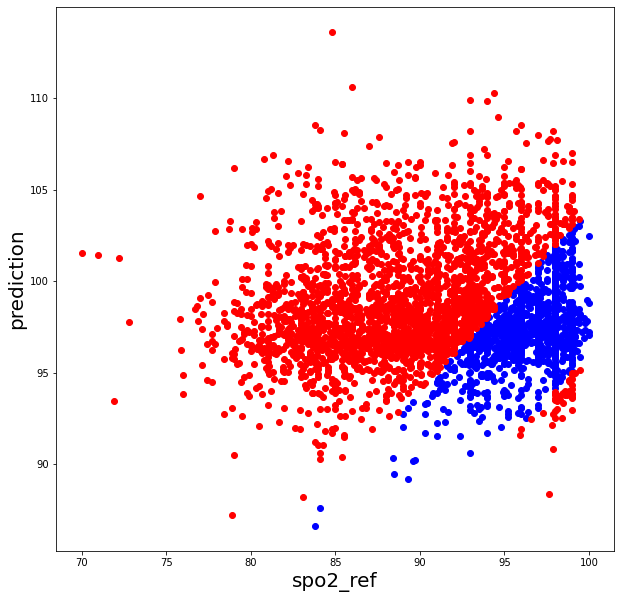

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('spo2_ref',fontsize='20')
plt.ylabel('prediction',fontsize='20')
# plt.xlim([65,105])
# plt.ylim([90,105])

for i in ['blue', 'red']:
    plt.scatter(df[df.difference == i].index,df[df.difference == i].pred,c=i)


In [ ]:
wrong = 0 

for i in range(n):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(chamber[i*batch:(i+1)*batch])
        wrong += list(abs(prediction-chamber_test[i*batch:(i+1)*batch].to(device)) > 4).count(True)

torch.cuda.empty_cache()
with torch.no_grad():
    model.eval()
    prediction = model(chamber[m:])
    wrong += list(abs(prediction-chamber_test[m:].to(device)) > 4).count(True)
    

print('수율: ', round(((data_len-wrong)/data_len)*100,2),'%')

loss = 0
for i in range(data_len):
    torch.cuda.empty_cache()
    with torch.no_grad():
        model.eval()
        prediction = model(chamber[i:i+1,:])
        diff = abs(prediction-chamber_test[i].to(device))

        if diff > 4:
            pass
        else: 
            loss += diff**2

print('수율 내 rmse: ', torch.sqrt(loss/(data_len-wrong)))

수율:  35.8 %
수율 내 rmse:  tensor([[2.0733]], device='cuda:0')


In [25]:
if wrong != data_len:
    ex_result['chamber'] = np.array([round(torch.sqrt(total/data_len).item(),4),round(((data_len-wrong)/data_len)*100,4),round(torch.sqrt(loss/(data_len-wrong)).item(),4)])
else:
    ex_result['chamber'] = np.array([round(torch.sqrt(total/data_len).item(),4),0,0])

### 결과 저장


In [17]:
ex_result

,ambulatory,ambul_self,pivotal,chamber
0,NaN,NaN,6.7802,NaN
1,NaN,NaN,37.4779,NaN
2,NaN,NaN,2.3955,NaN


In [18]:
path = 'H:/내 드라이브/spo2/0809~0812/TestResult/'

ex_result.to_csv(path+'CNN no weight sharing ssa,ppg new minmax pivotal/result.csv')